In [1]:
from pathlib import Path
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
Path.cwd().parent

PosixPath('/workspaces/Student-Success-repo')

In [2]:
# start from the notebook’s working directory
repo_root = Path.cwd().parent          # step up from …/notebooks to project root
csv2_path  = repo_root / "data" / "train_sample.csv"

train = pd.read_csv(csv2_path)
#keotaba mosiks taba ke ena hleka hlm

In [3]:
train

,ID,Industry,Company,Opportunity,Candidate,Gender,Age,Race,Institution,Aggregate,Qualification,Disciplines,Progress,Successful
0,2082,Financial Services,Client A,1,2082,Female,30,Asian,Stellenberg High School,71,National Senior Certificate,NaN,2,False
1,74,Financial Services,Client A,1,74,Female,18,Black,University of Johannesburg,53,Bachelor of Arts,"Journalism, Languages and Linguistics",3,False
2,2151,Financial Services,Client A,1,2151,Female,29,Indian,Stellenberg High School,72,National Senior Certificate,NaN,1,False
3,110,Financial Services,Client A,1,110,Female,24,Asian,Stellenberg High School,55,National Senior Certificate,NaN,2,False
4,1285,Financial Services,Client A,1,1285,Female,24,Black,University of Cape Town,60,Bachelor of Business Science,"Business and Management Studies, Marketing",1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,1639,Financial Services,Client A,1,1639,Female,26,Coloured,University of Cape Town,59,Doctor of Philosophy,Geography and Environmental Sciences,2,False
2069,1096,Financial Services,Client A,1,1096,Female,24,Indian,Stellenbosch University,62,Bachelor of Science,"Biological Sciences, Geography and Environment...",2,False
2070,1131,Financial Services,Client A,1,1131,Female,22,Black,Stellenberg High School,66,National Senior Certificate,NaN,1,False
2071,1295,Financial Services,Client A,1,1295,Female,32,Black,Stellenberg High School,65,National Senior Certificate,NaN,5,True


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   ID             2073 non-null   int64 
 1   Industry       2073 non-null   object
 2   Company        2073 non-null   object
 3   Opportunity    2073 non-null   int64 
 4   Candidate      2073 non-null   int64 
 5   Gender         2073 non-null   object
 6   Age            2073 non-null   int64 
 7   Race           2073 non-null   object
 8   Institution    2073 non-null   object
 9   Aggregate      2073 non-null   int64 
 10  Qualification  2073 non-null   object
 11  Disciplines    970 non-null    object
 12  Progress       2073 non-null   int64 
 13  Successful     2073 non-null   bool  
dtypes: bool(1), int64(6), object(7)
memory usage: 212.7+ KB


In [5]:
train.shape

(2073, 14)

In [6]:
train.columns

Index(['ID', 'Industry', 'Company', 'Opportunity', 'Candidate', 'Gender',
       'Age', 'Race', 'Institution', 'Aggregate', 'Qualification',
       'Disciplines', 'Progress', 'Successful'],
      dtype='object')

In [7]:
train.isnull().sum()

ID                  0
Industry            0
Company             0
Opportunity         0
Candidate           0
Gender              0
Age                 0
Race                0
Institution         0
Aggregate           0
Qualification       0
Disciplines      1103
Progress            0
Successful          0
dtype: int64

In [8]:
train.describe()

,ID,Opportunity,Candidate,Age,Aggregate,Progress
count,2073.000000,2073.0,2073.000000,2073.000000,2073.000000,2073.000000
mean,1146.623734,1.0,1146.623734,24.836951,62.534491,1.957549
std,664.628662,0.0,664.628662,4.068957,7.362307,1.218080
min,1.000000,1.0,1.000000,18.000000,50.000000,1.000000
25%,576.000000,1.0,576.000000,21.000000,57.000000,1.000000
50%,1141.000000,1.0,1141.000000,25.000000,62.000000,2.000000
75%,1722.000000,1.0,1722.000000,28.000000,69.000000,3.000000
max,2304.000000,1.0,2304.000000,32.000000,75.000000,5.000000


In [9]:
train.drop(columns=["Company", "ID", "Candidate",'Industry', 'Opportunity', "Successful"], inplace=True, axis=1)

In [10]:
train

,Gender,Age,Race,Institution,Aggregate,Qualification,Disciplines,Progress
0,Female,30,Asian,Stellenberg High School,71,National Senior Certificate,NaN,2
1,Female,18,Black,University of Johannesburg,53,Bachelor of Arts,"Journalism, Languages and Linguistics",3
2,Female,29,Indian,Stellenberg High School,72,National Senior Certificate,NaN,1
3,Female,24,Asian,Stellenberg High School,55,National Senior Certificate,NaN,2
4,Female,24,Black,University of Cape Town,60,Bachelor of Business Science,"Business and Management Studies, Marketing",1
...,...,...,...,...,...,...,...,...
2068,Female,26,Coloured,University of Cape Town,59,Doctor of Philosophy,Geography and Environmental Sciences,2
2069,Female,24,Indian,Stellenbosch University,62,Bachelor of Science,"Biological Sciences, Geography and Environment...",2
2070,Female,22,Black,Stellenberg High School,66,National Senior Certificate,NaN,1
2071,Female,32,Black,Stellenberg High School,65,National Senior Certificate,NaN,5


In [11]:
NaN_disiplines = train[train["Disciplines"].isna()]
NaN_disiplines["Qualification"].value_counts()


Qualification
National Senior Certificate     1059
Bachelor of Arts                  19
Bachelor of Commerce              12
Bachelor of Science                5
Postgraduate Diploma               3
Bachelor of Engineering            2
Bachelor of Business Science       1
Bachelor of Mine Surveying         1
Bachelor of Philosophy             1
Name: count, dtype: int64

In [12]:
#Replace missing (NaN) values with 'Unknown'
train["Disciplines"] = train["Disciplines"].fillna('Unknown')

In [13]:
train

,Gender,Age,Race,Institution,Aggregate,Qualification,Disciplines,Progress
0,Female,30,Asian,Stellenberg High School,71,National Senior Certificate,Unknown,2
1,Female,18,Black,University of Johannesburg,53,Bachelor of Arts,"Journalism, Languages and Linguistics",3
2,Female,29,Indian,Stellenberg High School,72,National Senior Certificate,Unknown,1
3,Female,24,Asian,Stellenberg High School,55,National Senior Certificate,Unknown,2
4,Female,24,Black,University of Cape Town,60,Bachelor of Business Science,"Business and Management Studies, Marketing",1
...,...,...,...,...,...,...,...,...
2068,Female,26,Coloured,University of Cape Town,59,Doctor of Philosophy,Geography and Environmental Sciences,2
2069,Female,24,Indian,Stellenbosch University,62,Bachelor of Science,"Biological Sciences, Geography and Environment...",2
2070,Female,22,Black,Stellenberg High School,66,National Senior Certificate,Unknown,1
2071,Female,32,Black,Stellenberg High School,65,National Senior Certificate,Unknown,5


In [14]:
cat_cols = ["Gender", "Race", "Institution", "Disciplines", "Qualification"]  # or whatever your list is
train = pd.get_dummies(train, columns=cat_cols, dummy_na=True)


In [15]:
train

,Age,Aggregate,Progress,Gender_Female,Gender_nan,Race_Asian,Race_Black,Race_Coloured,Race_Indian,Race_White,...,Qualification_Master of Engineering,Qualification_Master of Laws,Qualification_Master of Music,Qualification_Master of Philosophy,Qualification_Master of Public Administration,Qualification_Master of Science,Qualification_Master of Social Science,Qualification_National Senior Certificate,Qualification_Postgraduate Diploma,Qualification_nan
0,30,71,2,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,18,53,3,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,29,72,1,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,True,False,False
3,24,55,2,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,24,60,1,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2068,26,59,2,True,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
2069,24,62,2,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2070,22,66,1,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2071,32,65,5,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [16]:
X = train.drop(columns=["Progress"])  # Drop the target column from the features
y = train["Progress"]                 # This is the target we're predicting


In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,train_size = 0.9, test_size=0.1, random_state=42)

In [18]:
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_valid.shape)


Training set shape: (1658, 279)
Validation set shape: (415, 279)


In [19]:
# Initialize the model
model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
# Predict on X_valid
y_pred = model.predict(X_valid)


In [21]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_valid, y_pred)
print(f"Validation MAE: {mae:.4f}")


Validation MAE: 1.0869


In [22]:
from sklearn.metrics import r2_score

r2 = r2_score(y_valid, y_pred)
print(f"R^2 (coefficient of determination): {r2:.4f}")


R^2 (coefficient of determination): -0.2319


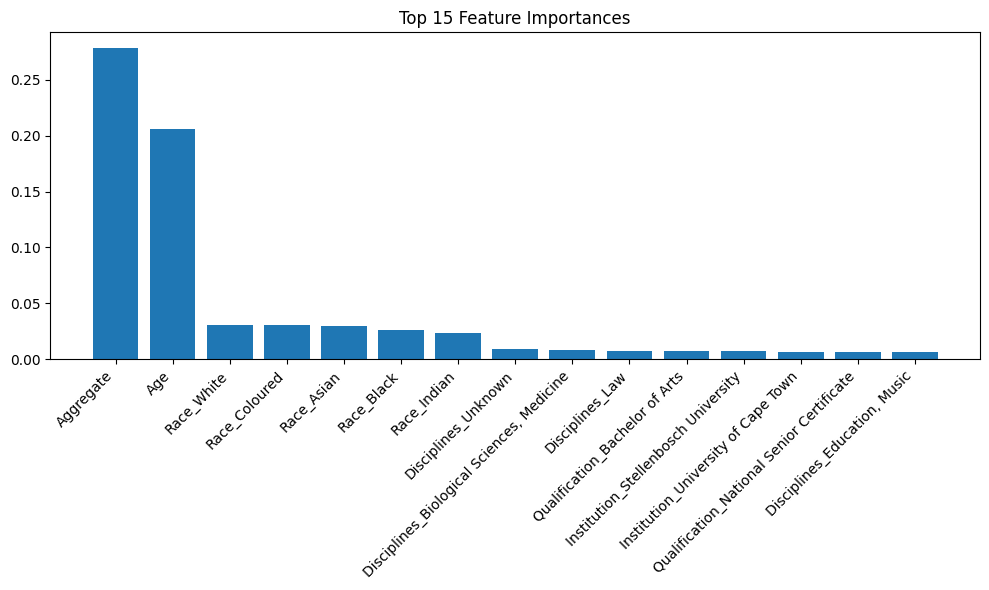

In [23]:
import matplotlib.pyplot as plt

importances = model.feature_importances_
feature_names = X_train.columns

# Sort features by importance
sorted_indices = importances.argsort()[::-1]

# Plot top 15 features
plt.figure(figsize=(10, 6))
plt.title("Top 15 Feature Importances")
plt.bar(range(15), importances[sorted_indices[:15]], align='center')
plt.xticks(range(15), [feature_names[i] for i in sorted_indices[:15]], rotation=45, ha='right')
plt.tight_layout()
plt.show()


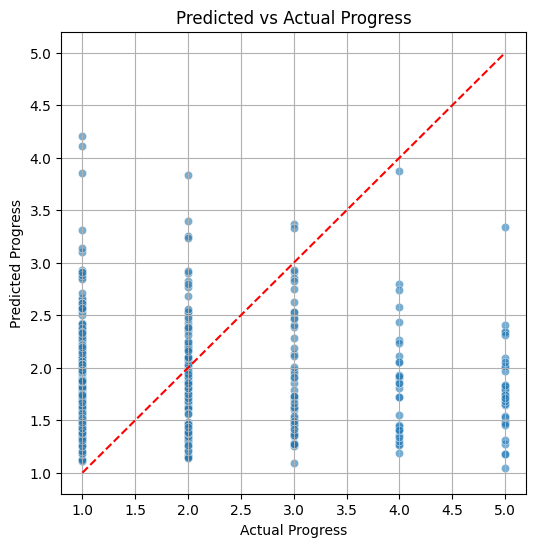

In [24]:
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.scatterplot(x=y_valid, y=y_pred, alpha=0.6)
plt.plot([1, 5], [1, 5], '--r')  # Perfect prediction line
plt.xlabel("Actual Progress")
plt.ylabel("Predicted Progress")
plt.title("Predicted vs Actual Progress")
plt.grid(True)
plt.show()
